<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [MNIST2] - Simple classification with CNN
<!-- DESC --> An example of classification using a convolutional neural network for the famous MNIST dataset
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - Recognizing handwritten numbers
 - Understanding the principle of a classifier DNN network 
 - Implementation with Keras 


The [MNIST dataset](http://yann.lecun.com/exdb/mnist/) (Modified National Institute of Standards and Technology) is a must for Deep Learning.  
It consists of 60,000 small images of handwritten numbers for learning and 10,000 for testing.


## What we're going to do :

 - Retrieve data
 - Preparing the data
 - Create a model
 - Train the model
 - Evaluate the result


## Step 1 - Init python stuff

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import sys,os
from importlib import reload

sys.path.append('..')
import fidle.pwk as pwk

datasets_dir = pwk.init('MNIST1')

<br>**FIDLE 2020 - Practical Work Module**

Version              : 2.0.14
Notebook id          : MNIST1
Run time             : Wednesday 10 February 2021, 09:10:52
TensorFlow version   : 2.4.0
Keras version        : 2.4.0
Datasets dir         : /gpfswork/rech/mlh/uja62cb/datasets
Run dir              : ./run
Update keras cache   : False
Save figs            : True
Path figs            : ./run/figs


## Step 2 - Retrieve data
MNIST is one of the most famous historic dataset.  
Include in [Keras datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1,28,28,1)
x_test  = x_test.reshape(-1,28,28,1)

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28, 1)
y_train :  (60000,)
x_test  :  (10000, 28, 28, 1)
y_test  :  (10000,)


## Step 3 - Preparing the data

In [3]:
print('Before normalization : Min={}, max={}'.format(x_train.min(),x_train.max()))

xmax=x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax

print('After normalization  : Min={}, max={}'.format(x_train.min(),x_train.max()))

Before normalization : Min=0, max=255


After normalization  : Min=0.0, max=1.0


### Have a look

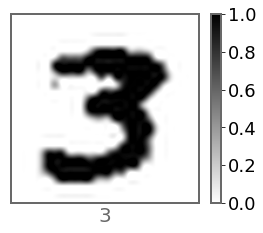

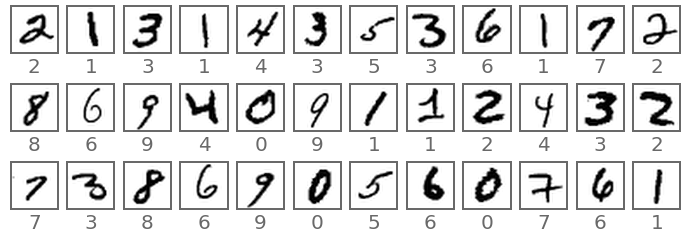

In [4]:
pwk.plot_images(x_train, y_train, [27],  x_size=5,y_size=5, colorbar=True, save_as='01-one-digit')
pwk.plot_images(x_train, y_train, range(5,41), columns=12, save_as='02-many-digits')

## Step 4 - Create model
About informations about : 
 - [Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
 - [Activation](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
 - [Loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
 - [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

In [5]:
hidden1     = 100
hidden2     = 100

model = keras.models.Sequential()

model.add( keras.layers.Input((28,28,1)) )

model.add( keras.layers.Conv2D(8, (3,3),  activation='relu') )
model.add( keras.layers.MaxPooling2D((2,2)))
model.add( keras.layers.Dropout(0.2))

model.add( keras.layers.Conv2D(16, (3,3), activation='relu') )
model.add( keras.layers.MaxPooling2D((2,2)))
model.add( keras.layers.Dropout(0.2))

model.add( keras.layers.Flatten()) 
model.add( keras.layers.Dense(100, activation='relu'))
model.add( keras.layers.Dropout(0.5))

model.add( keras.layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0

## Step 5 - Train the model

In [7]:
batch_size  = 512
epochs      =  16

history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = 1,
                      validation_data = (x_test, y_test))

Epoch 1/16


  1/118 [..............................] - ETA: 17:34 - loss: 2.3672 - accuracy: 0.0723

 21/118 [====>.........................] - ETA: 0s - loss: 2.2027 - accuracy: 0.1890   

 42/118 [=========>....................] - ETA: 0s - loss: 2.0232 - accuracy: 0.2799

 63/118 [===============>..............] - ETA: 0s - loss: 1.8562 - accuracy: 0.3489

 85/118 [====================>.........] - ETA: 0s - loss: 1.7116 - accuracy: 0.4050

106/118 [=========================>....] - ETA: 0s - loss: 1.5983 - accuracy: 0.4479

118/118 [==============================] - ETA: 0s - loss: 1.5422 - accuracy: 0.4688

118/118 [==============================] - 10s 10ms/step - loss: 1.5379 - accuracy: 0.4704 - val_loss: 0.2539 - val_accuracy: 0.9335


Epoch 2/16
  1/118 [..............................] - ETA: 0s - loss: 0.4530 - accuracy: 0.8613

 22/118 [====>.........................] - ETA: 0s - loss: 0.4518 - accuracy: 0.8618

 43/118 [=========>....................] - ETA: 0s - loss: 0.4423 - accuracy: 0.8643

 64/118 [===============>..............] - ETA: 0s - loss: 0.4345 - accuracy: 0.8666

 86/118 [====================>.........] - ETA: 0s - loss: 0.4268 - accuracy: 0.8690

108/118 [==========================>...] - ETA: 0s - loss: 0.4193 - accuracy: 0.8714

118/118 [==============================] - 0s 3ms/step - loss: 0.4157 - accuracy: 0.8725 - val_loss: 0.1502 - val_accuracy: 0.9559


Epoch 3/16
  1/118 [..............................] - ETA: 0s - loss: 0.3666 - accuracy: 0.8945

 22/118 [====>.........................] - ETA: 0s - loss: 0.3170 - accuracy: 0.9054

 44/118 [==========>...................] - ETA: 0s - loss: 0.3097 - accuracy: 0.9070

 65/118 [===============>..............] - ETA: 0s - loss: 0.3058 - accuracy: 0.9078

 86/118 [====================>.........] - ETA: 0s - loss: 0.3022 - accuracy: 0.9087

108/118 [==========================>...] - ETA: 0s - loss: 0.2984 - accuracy: 0.9097

118/118 [==============================] - 0s 3ms/step - loss: 0.2967 - accuracy: 0.9101 - val_loss: 0.1180 - val_accuracy: 0.9642


Epoch 4/16
  1/118 [..............................] - ETA: 0s - loss: 0.2733 - accuracy: 0.9199

 22/118 [====>.........................] - ETA: 0s - loss: 0.2582 - accuracy: 0.9246

 43/118 [=========>....................] - ETA: 0s - loss: 0.2550 - accuracy: 0.9245

 65/118 [===============>..............] - ETA: 0s - loss: 0.2519 - accuracy: 0.9247

 86/118 [====================>.........] - ETA: 0s - loss: 0.2497 - accuracy: 0.9252

107/118 [==========================>...] - ETA: 0s - loss: 0.2481 - accuracy: 0.9256

118/118 [==============================] - 0s 3ms/step - loss: 0.2470 - accuracy: 0.9259 - val_loss: 0.0964 - val_accuracy: 0.9695


Epoch 5/16
  1/118 [..............................] - ETA: 0s - loss: 0.2046 - accuracy: 0.9355

 23/118 [====>.........................] - ETA: 0s - loss: 0.2081 - accuracy: 0.9362

 45/118 [==========>...................] - ETA: 0s - loss: 0.2091 - accuracy: 0.9357

 67/118 [================>.............] - ETA: 0s - loss: 0.2101 - accuracy: 0.9352

 88/118 [=====================>........] - ETA: 0s - loss: 0.2104 - accuracy: 0.9353

110/118 [==========================>...] - ETA: 0s - loss: 0.2100 - accuracy: 0.9356

118/118 [==============================] - 0s 3ms/step - loss: 0.2098 - accuracy: 0.9357 - val_loss: 0.0832 - val_accuracy: 0.9740


Epoch 6/16
  1/118 [..............................] - ETA: 0s - loss: 0.1933 - accuracy: 0.9355

 22/118 [====>.........................] - ETA: 0s - loss: 0.2090 - accuracy: 0.9357

 43/118 [=========>....................] - ETA: 0s - loss: 0.2051 - accuracy: 0.9372

 64/118 [===============>..............] - ETA: 0s - loss: 0.2026 - accuracy: 0.9383

 85/118 [====================>.........] - ETA: 0s - loss: 0.2003 - accuracy: 0.9392

106/118 [=========================>....] - ETA: 0s - loss: 0.1984 - accuracy: 0.9398

118/118 [==============================] - 0s 3ms/step - loss: 0.1973 - accuracy: 0.9402 - val_loss: 0.0769 - val_accuracy: 0.9747


Epoch 7/16
  1/118 [..............................] - ETA: 0s - loss: 0.1523 - accuracy: 0.9551

 22/118 [====>.........................] - ETA: 0s - loss: 0.1656 - accuracy: 0.9493

 44/118 [==========>...................] - ETA: 0s - loss: 0.1693 - accuracy: 0.9482

 66/118 [===============>..............] - ETA: 0s - loss: 0.1717 - accuracy: 0.9478

 87/118 [=====================>........] - ETA: 0s - loss: 0.1727 - accuracy: 0.9476

109/118 [==========================>...] - ETA: 0s - loss: 0.1732 - accuracy: 0.9474

118/118 [==============================] - 0s 3ms/step - loss: 0.1734 - accuracy: 0.9474 - val_loss: 0.0679 - val_accuracy: 0.9794


Epoch 8/16
  1/118 [..............................] - ETA: 0s - loss: 0.1778 - accuracy: 0.9414

 22/118 [====>.........................] - ETA: 0s - loss: 0.1699 - accuracy: 0.9476

 43/118 [=========>....................] - ETA: 0s - loss: 0.1706 - accuracy: 0.9479

 64/118 [===============>..............] - ETA: 0s - loss: 0.1696 - accuracy: 0.9485

 86/118 [====================>.........] - ETA: 0s - loss: 0.1683 - accuracy: 0.9491

107/118 [==========================>...] - ETA: 0s - loss: 0.1671 - accuracy: 0.9495

118/118 [==============================] - 0s 3ms/step - loss: 0.1665 - accuracy: 0.9497 - val_loss: 0.0621 - val_accuracy: 0.9802


Epoch 9/16
  1/118 [..............................] - ETA: 0s - loss: 0.1489 - accuracy: 0.9570

 22/118 [====>.........................] - ETA: 0s - loss: 0.1581 - accuracy: 0.9517

 44/118 [==========>...................] - ETA: 0s - loss: 0.1529 - accuracy: 0.9529

 65/118 [===============>..............] - ETA: 0s - loss: 0.1514 - accuracy: 0.9535

 87/118 [=====================>........] - ETA: 0s - loss: 0.1513 - accuracy: 0.9538

109/118 [==========================>...] - ETA: 0s - loss: 0.1512 - accuracy: 0.9540

118/118 [==============================] - 0s 3ms/step - loss: 0.1511 - accuracy: 0.9540 - val_loss: 0.0585 - val_accuracy: 0.9808


Epoch 10/16
  1/118 [..............................] - ETA: 0s - loss: 0.1480 - accuracy: 0.9590

 22/118 [====>.........................] - ETA: 0s - loss: 0.1485 - accuracy: 0.9563

 43/118 [=========>....................] - ETA: 0s - loss: 0.1494 - accuracy: 0.9559

 64/118 [===============>..............] - ETA: 0s - loss: 0.1484 - accuracy: 0.9561

 85/118 [====================>.........] - ETA: 0s - loss: 0.1472 - accuracy: 0.9563

106/118 [=========================>....] - ETA: 0s - loss: 0.1461 - accuracy: 0.9566

118/118 [==============================] - 0s 3ms/step - loss: 0.1456 - accuracy: 0.9567 - val_loss: 0.0569 - val_accuracy: 0.9822


Epoch 11/16
  1/118 [..............................] - ETA: 0s - loss: 0.1356 - accuracy: 0.9551

 22/118 [====>.........................] - ETA: 0s - loss: 0.1461 - accuracy: 0.9548

 43/118 [=========>....................] - ETA: 0s - loss: 0.1432 - accuracy: 0.9563

 64/118 [===============>..............] - ETA: 0s - loss: 0.1404 - accuracy: 0.9572

 85/118 [====================>.........] - ETA: 0s - loss: 0.1390 - accuracy: 0.9578

107/118 [==========================>...] - ETA: 0s - loss: 0.1382 - accuracy: 0.9581

118/118 [==============================] - 0s 3ms/step - loss: 0.1379 - accuracy: 0.9582 - val_loss: 0.0520 - val_accuracy: 0.9830


Epoch 12/16
  1/118 [..............................] - ETA: 0s - loss: 0.1413 - accuracy: 0.9512

 23/118 [====>.........................] - ETA: 0s - loss: 0.1254 - accuracy: 0.9622

 45/118 [==========>...................] - ETA: 0s - loss: 0.1254 - accuracy: 0.9620

 67/118 [================>.............] - ETA: 0s - loss: 0.1267 - accuracy: 0.9616

 89/118 [=====================>........] - ETA: 0s - loss: 0.1276 - accuracy: 0.9614

110/118 [==========================>...] - ETA: 0s - loss: 0.1284 - accuracy: 0.9611

118/118 [==============================] - 0s 3ms/step - loss: 0.1287 - accuracy: 0.9610 - val_loss: 0.0499 - val_accuracy: 0.9839


Epoch 13/16
  1/118 [..............................] - ETA: 0s - loss: 0.0856 - accuracy: 0.9727

 22/118 [====>.........................] - ETA: 0s - loss: 0.1108 - accuracy: 0.9646

 43/118 [=========>....................] - ETA: 0s - loss: 0.1172 - accuracy: 0.9633

 64/118 [===============>..............] - ETA: 0s - loss: 0.1193 - accuracy: 0.9630

 85/118 [====================>.........] - ETA: 0s - loss: 0.1205 - accuracy: 0.9629

106/118 [=========================>....] - ETA: 0s - loss: 0.1213 - accuracy: 0.9628

118/118 [==============================] - 0s 3ms/step - loss: 0.1218 - accuracy: 0.9627 - val_loss: 0.0465 - val_accuracy: 0.9849


Epoch 14/16
  1/118 [..............................] - ETA: 0s - loss: 0.1450 - accuracy: 0.9531

 22/118 [====>.........................] - ETA: 0s - loss: 0.1193 - accuracy: 0.9655

 43/118 [=========>....................] - ETA: 0s - loss: 0.1203 - accuracy: 0.9644

 64/118 [===============>..............] - ETA: 0s - loss: 0.1213 - accuracy: 0.9641

 86/118 [====================>.........] - ETA: 0s - loss: 0.1222 - accuracy: 0.9638

108/118 [==========================>...] - ETA: 0s - loss: 0.1225 - accuracy: 0.9638

118/118 [==============================] - 0s 3ms/step - loss: 0.1225 - accuracy: 0.9637 - val_loss: 0.0462 - val_accuracy: 0.9848


Epoch 15/16
  1/118 [..............................] - ETA: 0s - loss: 0.1042 - accuracy: 0.9707

 23/118 [====>.........................] - ETA: 0s - loss: 0.1239 - accuracy: 0.9647

 44/118 [==========>...................] - ETA: 0s - loss: 0.1208 - accuracy: 0.9648

 65/118 [===============>..............] - ETA: 0s - loss: 0.1194 - accuracy: 0.9648

 87/118 [=====================>........] - ETA: 0s - loss: 0.1186 - accuracy: 0.9649

109/118 [==========================>...] - ETA: 0s - loss: 0.1179 - accuracy: 0.9649

118/118 [==============================] - 0s 3ms/step - loss: 0.1178 - accuracy: 0.9649 - val_loss: 0.0451 - val_accuracy: 0.9860


Epoch 16/16
  1/118 [..............................] - ETA: 0s - loss: 0.1149 - accuracy: 0.9629

 23/118 [====>.........................] - ETA: 0s - loss: 0.1064 - accuracy: 0.9654

 44/118 [==========>...................] - ETA: 0s - loss: 0.1087 - accuracy: 0.9649

 65/118 [===============>..............] - ETA: 0s - loss: 0.1107 - accuracy: 0.9646

 87/118 [=====================>........] - ETA: 0s - loss: 0.1121 - accuracy: 0.9645

109/118 [==========================>...] - ETA: 0s - loss: 0.1127 - accuracy: 0.9646

118/118 [==============================] - 0s 3ms/step - loss: 0.1128 - accuracy: 0.9646 - val_loss: 0.0429 - val_accuracy: 0.9864


## Step 6 - Evaluate
### 6.1 - Final loss and accuracy
Note : With a DNN, we had a precision of the order of : 97.7%

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)

print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

Test loss     : 0.0429
Test accuracy : 0.9864


### 6.2 - Plot history

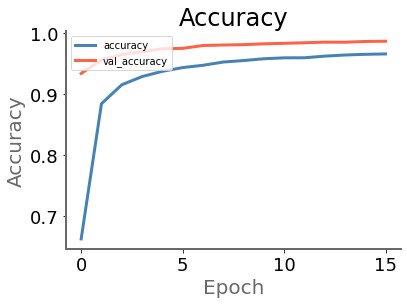

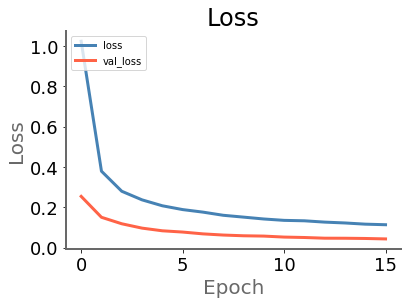

In [9]:
pwk.plot_history(history, figsize=(6,4), save_as='03-history')

### 6.3 - Plot results

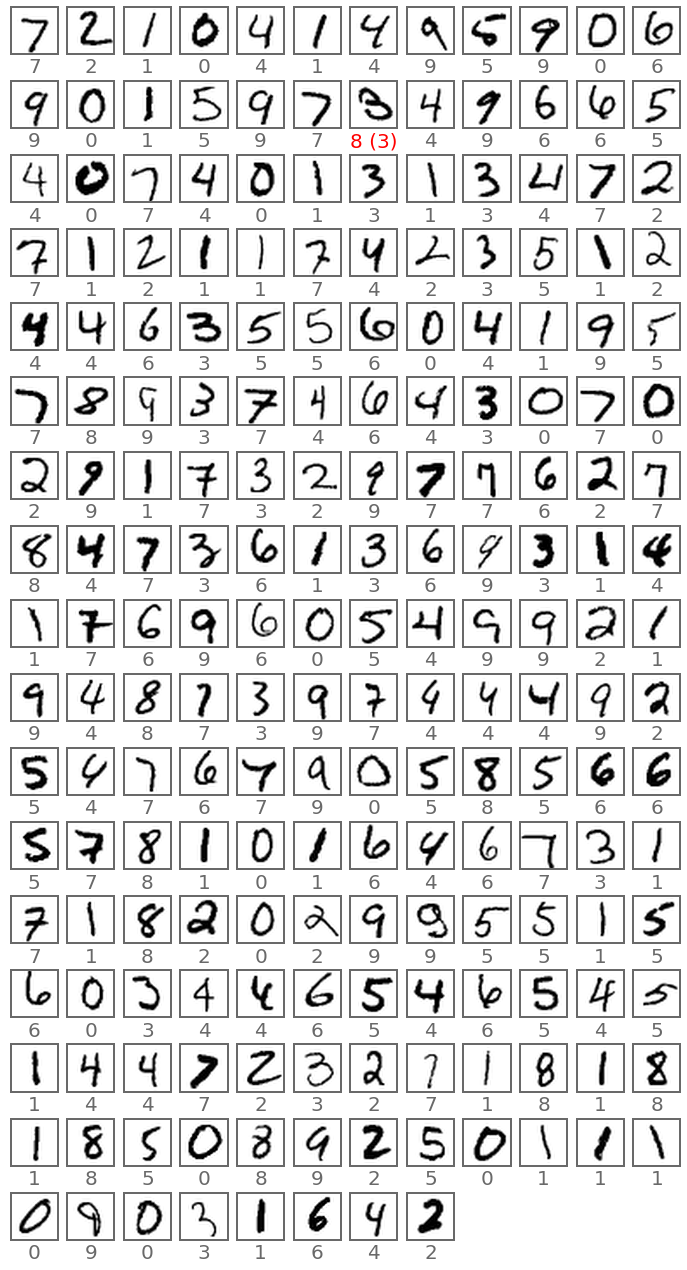

In [10]:
#y_pred   = model.predict_classes(x_test)           Deprecated after 01/01/2021 !!

y_sigmoid = model.predict(x_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)

pwk.plot_images(x_test, y_test, range(0,200), columns=12, x_size=1, y_size=1, y_pred=y_pred, save_as='04-predictions')

### 6.4 - Plot some errors

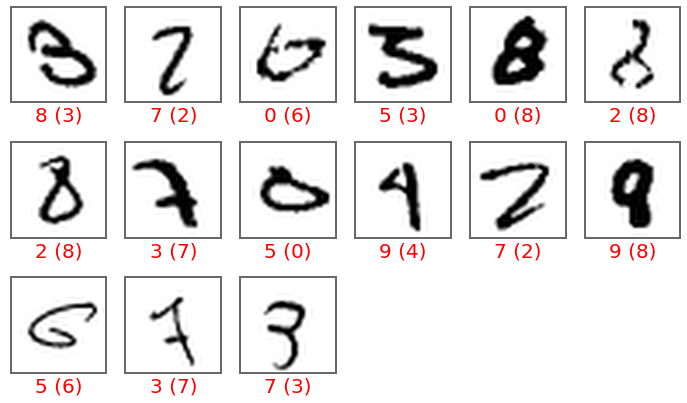

In [11]:
errors=[ i for i in range(len(x_test)) if y_pred[i]!=y_test[i] ]
errors=errors[:min(24,len(errors))]
pwk.plot_images(x_test, y_test, errors[:15], columns=6, x_size=2, y_size=2, y_pred=y_pred, save_as='05-some-errors')

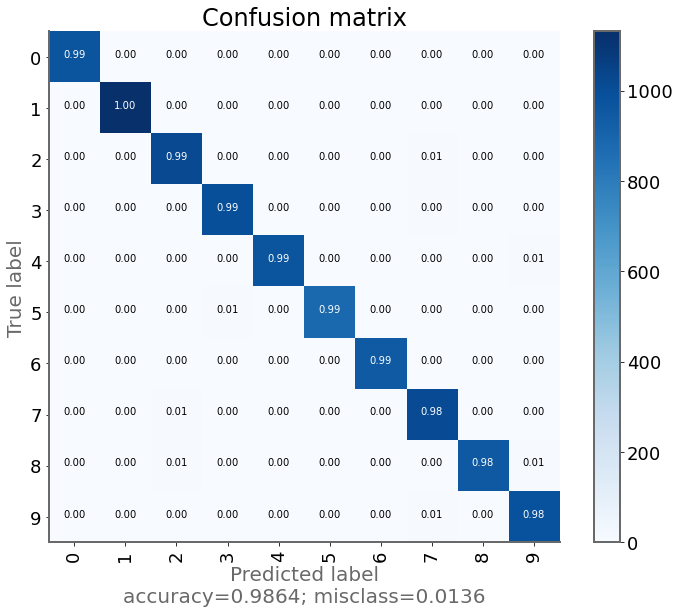

In [12]:
pwk.plot_confusion_matrix(y_test,y_pred,range(10),normalize=True, save_as='06-confusion-matrix')

In [13]:
pwk.end()

End time is : Wednesday 10 February 2021, 09:11:44
Duration is : 00:00:52 430ms
This notebook ends here


<div class="todo">
    A few things you can do for fun:
    <ul>
        <li>Changing the network architecture (layers, number of neurons, etc.)</li>
        <li>Display a summary of the network</li>
        <li>Retrieve and display the softmax output of the network, to evaluate its "doubts".</li>
    </ul>
</div>

---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>